<a href="https://colab.research.google.com/github/Guna940/Implementation-of-K-Means-Clustering-for-Customer-Segmentation./blob/main/Exp_No_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("/content/Mall_Customers (1).csv")
print("data.head():")
data.head()

data.head():


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
print("data.info():")
data.info()

data.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [2]:
print("data.isnull().sum():")
data.isnull().sum()
from sklearn.cluster import KMeans
wcss = []

data.isnull().sum():


In [3]:
for i in range (1,11):
    kmeans = KMeans(n_clusters = i,init = "k-means++")
    kmeans.fit(data.iloc[:,3:])
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Elbow Method Graph:


Text(0.5, 1.0, 'Elbow Method')

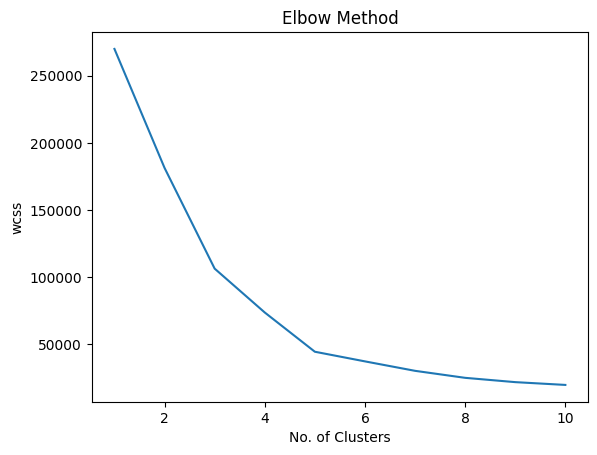

In [4]:
print("Elbow Method Graph:")
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("wcss")
plt.title("Elbow Method")

In [5]:
print("KMeans cluster value:")
km = KMeans(n_clusters = 5)
km.fit(data.iloc[:,3:])

KMeans cluster value:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [6]:
print("y_pred:")
y_pred = km.predict(data.iloc[:,3:])
y_pred

y_pred:


array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

Customer Segments Graph:


Text(0.5, 1.0, 'Customer Segments')

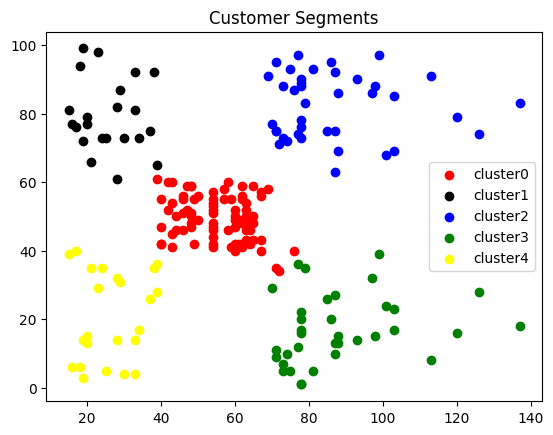

In [7]:
print("Customer Segments Graph:")
data["cluster"] = y_pred
df0=data[data["cluster"]==0]
df1=data[data["cluster"]==1]
df2=data[data["cluster"]==2]
df3=data[data["cluster"]==3]
df4=data[data["cluster"]==4]
plt.scatter(df0["Annual Income (k$)"],df0["Spending Score (1-100)"],c="red",label="cluster0")
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],c="black",label="cluster1")
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"],c="blue",label="cluster2")
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"],c="green",label="cluster3")
plt.scatter(df4["Annual Income (k$)"],df4["Spending Score (1-100)"],c="yellow",label="cluster4")
plt.legend()
plt.title("Customer Segments")